In [2]:
import os 
import glob

circles_files = glob.glob("twitter/*.circles")
edges_files = glob.glob("twitter/*.edges")
egofeat_files = glob.glob("twitter/*.egofeat")
feat_files = glob.glob("twitter/*.feat")
featnames_files = glob.glob("twitter/*.featnames")

In [3]:
import numpy as np

In [ ]:
!python -m pip install python-igraph

In [9]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
egoNodeList = []
for item in circles_files:
    twitter, circleFilename = item.split("\\")
    #circleFilename = circleFilename[1]
   # print(circleFilename)
    filename, abcd = circleFilename.split(".")
    #print(filename)
    egoNodeList.append(filename)

In [5]:
def read_circles(filename):
    circles = []
    un_users = set()
    for line in open(filename):
        lst = line.split('\t')
        el, es = lst[0], lst[1:]
        circle = set()
        for e in es:
            circle.add(int(e))
            un_users.add(int(e))
        circles.append(circle)
    return circles, un_users

In [6]:
users_circles = {}
users_un_users = {}
for ego in egoNodeList:
    filename = str(ego) + '.circles'
    circles, un_users = read_circles("twitter/" + filename)
    users_circles[ego] = circles
    users_un_users[ego] = un_users

In [7]:
def read_nodeadjlist(filename):
    G = nx.Graph()
    for line in open(filename):
        lst = line.split(' ')
        el, es = lst[0], lst[1:]
        circle = set()
        for e in es:
            if e == el: continue
            G.add_edge(int(el),int(e))
    return G

In [1]:
def my_algorithm(G, power):
     # find the single most popular user
    pageDictionary = nx.pagerank(G)
    pageRanks = list(pageDictionary.values())
    pageNodes = list(pageDictionary.keys())
    
    score = []
    for rank in pageRanks:
        score.append(rank)

    listOfSets = []
    for i, rank in enumerate(score):
        Ok = False
        for j in listOfSets:
            OK1 = True
            al = 0
            z = 0
            for k in j:
                if G.has_edge(k, pageNodes[i]):
                    z += 1
                al += 1

            OK1 = ((z + 0.0) / al) >= power
            if OK1:
                j.add(pageNodes[i])
                Ok = True
                break
        if Ok is False:
            newSets = set()
            newSets.add(pageNodes[i])
            listOfSets.append(newSets)
    return listOfSets

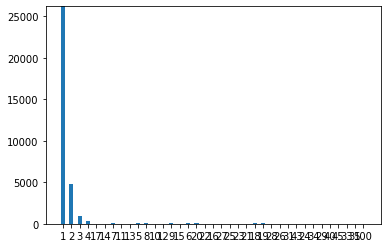

In [10]:
ans = {}
m = {}
for ego in egoNodeList:
    filename = str(ego) + '.circles'
    circles, un_users = read_circles("twitter/"  + filename)

    users_un_users = {}
    for circle in circles:
        for us in circle:
            if us not in users_un_users:
                 users_un_users[us]=1
            else:
                users_un_users[us]+=1
    v = {}
    for key, value in sorted(users_un_users.items()):
        v.setdefault(value, []).append(key)
    for key, value in v.items():
        if key not in ans:
            ans[key] = len(value)
        else:
            ans[key] += len(value)
    mm = 0
    for key, value in v.items():
        mm += key*len(value)
    if (len(un_users) != 0):
        m[ego] = (mm+0.0) / len(un_users)
d = ans        
X = np.arange(len(d))
plt.bar(X, d.values(), align='center', width=0.5)
plt.xticks(X, d.keys())
ymax = max(d.values()) + 1
plt.ylim(0, ymax)
plt.show()

Node Degree
177378039 15
31257471 8
128956175 9
15227791 10
15857462 13
21596877 15
36628828 3
24646282 8
214589342 13
214589522 12
28995973 16
246481013 11
90420314 14
14328339 15
31685653 12
18713254 11
21692297 9
544517731 2
28521141 6
21414413 10
33051095 15
14755492 2
18948541 8
15846682 14
79797834 9
415752096 8
19279990 5
149217510 6
22324642 13
12611642 6
18520053 6
248917209 5
6017542 13
17093617 9
264045662 5
20448269 4
22027992 2
28562317 5
57107167 4
17060265 5
14134204 7
18822966 1


C:\Users\Rutul Thakkar\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


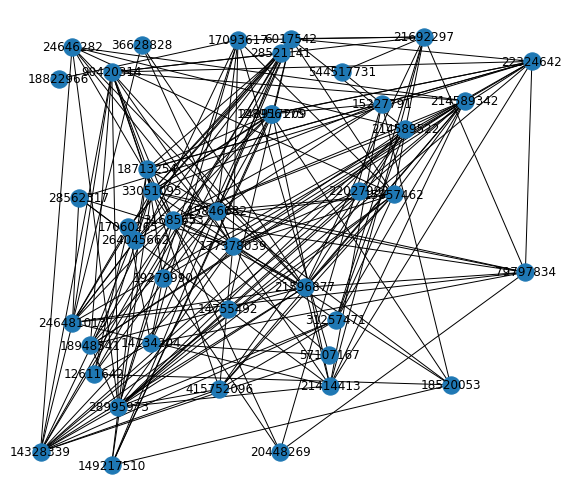

<Figure size 432x288 with 0 Axes>

In [11]:
G = read_nodeadjlist("twitter/237845487.edges")

plt.figure(figsize = (10,9))
plt.axis('off')
 

print("Node Degree")
for v in G:
    print('%s %s' % (v, G.degree(v)))

#nx.draw_circular(G, with_labels=True)
nx.draw_random(G, with_labels=True)
#nx.draw_random(G)
#nx.draw_networkx(G, with_labels=True)
#nx.draw_spectral(G, with_labels=True)
plt.show()
plt.savefig("map_0.png", format = "png", dpi = 300)

In [12]:
from networkx.algorithms import community
G = read_nodeadjlist("twitter/12831.edges")
communities_generator = community.girvan_newman(G)

In [13]:
import itertools


In [14]:
for communities in itertools.islice(communities_generator, 3):
    print(tuple(sorted(c) for c in communities)) 
    print("\n")

([14, 47, 380, 528, 586, 761, 1186, 2372, 6735, 12741, 19223, 22253, 51123, 148943, 287713, 606083, 636923, 638323, 652193, 662423, 663463, 668423, 713263, 728163, 757502, 765548, 883301, 1260231, 1371101, 1566521, 1656891, 1678471, 1765921, 1859981, 2727051, 2735631, 3191321, 5264791, 5436752, 5634142, 5813712, 5827292, 5854882, 5994452, 6001592, 6088382, 6160742, 6253882, 6331462, 6368672, 6503412, 6687652, 6731422, 7415132, 7461782, 7821492, 8003822, 8067082, 8132642, 8479062, 8630302, 8630562, 8708232, 8866342, 8940282, 9283582, 9411772, 9611352, 9616792, 9767472, 9863222, 9943672, 10013512, 10044992, 10476462, 10587552, 11178592, 11322372, 12007182, 12081222, 12544312, 12725022, 12800212, 13019862, 13141442, 13334762, 13462502, 13538092, 13648692, 13652832, 13839772, 14086492, 14087951, 14142965, 14163141, 14172562, 14178728, 14202711, 14202817, 14220606, 14231571, 14267393, 14305022, 14313755, 14367669, 14450509, 14471007, 14710479, 14749606, 14809096, 14819149, 14838800, 1489219

In [15]:
first_iteration_comm = tuple(sorted(c) for c in next(communities_generator))

In [16]:
dict(enumerate(first_iteration_comm))

{0: [14,
  47,
  380,
  528,
  586,
  761,
  1186,
  2372,
  6735,
  12741,
  19223,
  22253,
  51123,
  148943,
  287713,
  606083,
  636923,
  638323,
  652193,
  662423,
  663463,
  668423,
  713263,
  728163,
  757502,
  765548,
  883301,
  1260231,
  1371101,
  1566521,
  1678471,
  1765921,
  1859981,
  2727051,
  2735631,
  3191321,
  5264791,
  5436752,
  5634142,
  5813712,
  5827292,
  5854882,
  5994452,
  6001592,
  6088382,
  6160742,
  6253882,
  6331462,
  6368672,
  6503412,
  6687652,
  6731422,
  7415132,
  7461782,
  7821492,
  8003822,
  8067082,
  8132642,
  8479062,
  8630302,
  8630562,
  8708232,
  8866342,
  8940282,
  9283582,
  9411772,
  9611352,
  9616792,
  9767472,
  9863222,
  9943672,
  10013512,
  10044992,
  10476462,
  10587552,
  11178592,
  11322372,
  12007182,
  12081222,
  12544312,
  12725022,
  12800212,
  13019862,
  13141442,
  13334762,
  13462502,
  13538092,
  13648692,
  13652832,
  13839772,
  14086492,
  14087951,
  14142965,
  1416314

In [17]:
def map_communities(G, communities):
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [18]:
from helpers import create_color_map


In [19]:
community_map = map_communities(G, first_iteration_comm)
nx.set_node_attributes(G,community_map,  'community')
node_colors, color_map, palette = create_color_map(G, 'community')

C:\Users\Rutul Thakkar\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


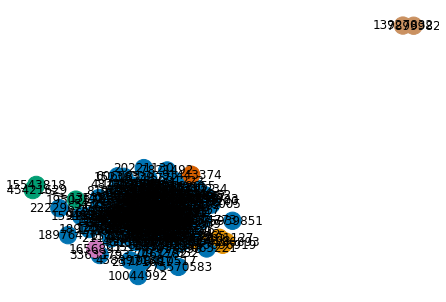

In [20]:
nx.draw(G, node_color=node_colors, with_labels=True)